In [1]:
import sys
import os
import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D

In [2]:
data_entrenamiento = "./data/entrenamiento"
data_validacion = "./data/validacion"

# Parametros

In [3]:
epocas = 100
altura, longitud = 50, 50
batch_size = 64
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 4
lr = 0.001

# Pre-procesamiento de imagenes

In [4]:
datagen_entrenamiento = ImageDataGenerator(rescale = 1./255, 
                                           shear_range = 0.3, 
                                           zoom_range = 0.3, 
                                           horizontal_flip = True)

datagen_validacion = ImageDataGenerator(rescale = 1./255)

In [5]:
imagen_entrenamiento = datagen_entrenamiento.flow_from_directory(data_entrenamiento, 
                                                                target_size = (altura, longitud), 
                                                                batch_size = batch_size, 
                                                                class_mode = "categorical")

imagen_validacion = datagen_validacion.flow_from_directory(data_validacion, 
                                                                target_size = (altura, longitud), 
                                                                batch_size = batch_size, 
                                                                class_mode = "categorical")

Found 3217 images belonging to 4 classes.
Found 765 images belonging to 4 classes.


# Red neuronal CNN

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(altura, longitud, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(clases, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [8]:
opt = optimizers.Adam(lr=lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
historico = model.fit(imagen_entrenamiento, epochs = epocas, validation_data = imagen_validacion)

Epoch 1/100
51/51 [==============================] - 23s 445ms/step - loss: 1.4153 - accuracy: 0.3174 - val_loss: 1.3295 - val_accuracy: 0.3725
Epoch 2/100
51/51 [==============================] - 24s 464ms/step - loss: 1.2322 - accuracy: 0.4203 - val_loss: 1.2916 - val_accuracy: 0.3464
Epoch 3/100
51/51 [==============================] - 24s 468ms/step - loss: 1.1597 - accuracy: 0.4569 - val_loss: 1.2171 - val_accuracy: 0.4562
Epoch 4/100
51/51 [==============================] - 24s 464ms/step - loss: 1.1112 - accuracy: 0.4859 - val_loss: 1.1626 - val_accuracy: 0.4771
Epoch 5/100
51/51 [==============================] - 22s 441ms/step - loss: 1.0278 - accuracy: 0.5536 - val_loss: 1.3816 - val_accuracy: 0.4444
Epoch 6/100
51/51 [==============================] - 22s 431ms/step - loss: 1.0427 - accuracy: 0.5480 - val_loss: 1.2360 - val_accuracy: 0.4327
Epoch 7/100
51/51 [==============================] - 22s 430ms/step - loss: 0.9494 - accuracy: 0.5999 - val_loss: 1.2191 - val_accuracy:

In [17]:

directorio = "./modelo/"

if not os.path.exists(directorio):
    os.mkdir(directorio)

model.save("./modelo/modelo_3caps_100epochs_DropoutProg_4class.h5")
model.save_weights("./modelo/pesos_3capas_100epochs_DropoutProg_4class.h5")


# Visualización


In [10]:
acc = historico.history["accuracy"]
loss = historico.history["loss"]
val_acc = historico.history["val_accuracy"]
val_loss = historico.history["val_loss"]
epocas = range(len(acc))

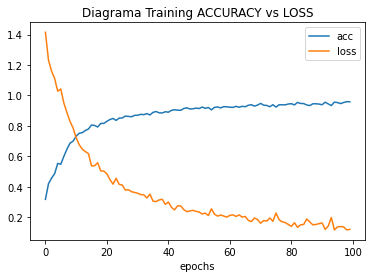

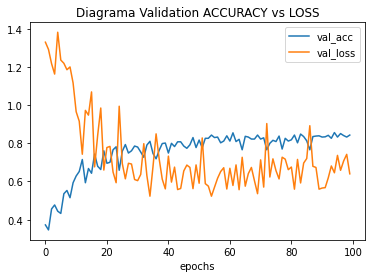

In [11]:
plt.plot(epocas, acc, label = "acc")
plt.plot(epocas, loss, label = "loss")
plt.title("Diagrama Training ACCURACY vs LOSS")
plt.xlabel("epochs")
plt.legend()
plt.figure()
plt.plot(epocas, val_acc, label = "val_acc")
plt.plot(epocas, val_loss, label = "val_loss")
plt.title("Diagrama Validation ACCURACY vs LOSS")
plt.xlabel("epochs")
plt.legend()
plt.show()

# Predicciones

In [12]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [ ]:
"""
modelo = "./modelo/modelo.h5"
pesos = "./modelo/pesos.h5"
cnn = load_model(modelo)
cnn.load_weights(pesos)
"""

In [ ]:
#cnn.summary()

In [13]:
def predict(file):
    x = load_img(file, target_size = (altura, longitud))
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    predict = model.predict(x)
    resultado = predict[0]
    #print(resultado)
    respuesta = np.argmax(resultado)
    posibilidades = {0:"Carpintero", 1: "Charran", 2: "Colibri", 3:"Curruca"}
    for k in posibilidades.keys():
        if k == respuesta:
            print(posibilidades[k])
    #return posibilidades[k]

In [14]:
files = [*glob.glob("img_testeo/*.jpg")]
for i in files:
    predict(i)

Curruca
Curruca
Colibri
Carpintero
Colibri
Carpintero
Charran
Charran


In [15]:
print(files)

['img_testeo/curruca2.jpg', 'img_testeo/curruca1.jpg', 'img_testeo/colibri1.jpg', 'img_testeo/carpintero2.jpg', 'img_testeo/colibri2.jpg', 'img_testeo/carpintero1.jpg', 'img_testeo/charran2.jpg', 'img_testeo/charran1.jpg']
